#1. Importing tensorflow

In [ ]:
import tensorflow as tf

# Importing the dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Display the dataset

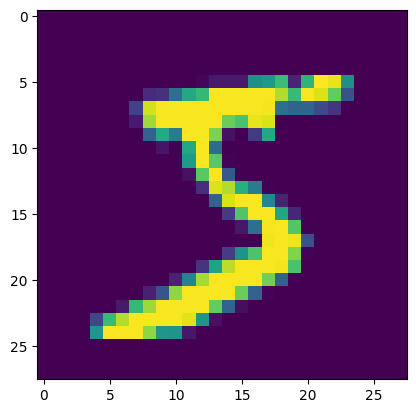

5


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
print(y_train[0])

In [ ]:
x_train = x_train.reshape(x_train.shape[0],-1)/255.0
x_test = x_test.reshape(x_test.shape[0],-1)/255.0

In [ ]:
print(x_train.shape, x_test.shape)


(60000, 784) (10000, 784)


In [ ]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train, epochs = 10, batch_size = 1024)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.7254 - loss: 1.0270
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9373 - loss: 0.2199
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9572 - loss: 0.1492
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9669 - loss: 0.1127
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9731 - loss: 0.0914
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9789 - loss: 0.0735
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9830 - loss: 0.0590
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9861 - loss: 0.0498
Epoch 9/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9887 - loss: 0.0399
Epoch 10/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9906 - loss: 0.0344


In [ ]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9752 - loss: 0.0828


[0.07274234294891357, 0.9782999753952026]

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Concatenate, Input

In [ ]:
input = Input(shape=[784,])
hidden_1 = Dense(256, activation = 'relu')(input)
hidden_2 = Dense(256, activation='relu')(hidden_1)
hidden_3 = Dense(256, activation ='relu')(input)
concat = Concatenate()([hidden_2, hidden_3])
output = Dense(10, activation='softmax')(concat)

In [ ]:
model = Model(inputs=[input], outputs = [output])
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 784)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_7 (Dense)           │ (None, 256)            │        200,960 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 256)            │         65,792 │ dense_7[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 256)            │        200,960 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 512)            │              0 │ dense_8[0][0],         │
│ (Concatenate)             │                        │                │ dense_9[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 10)             │          5,130 │ concatenate_1[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 472,842 (1.80 MB)

 Trainable params: 472,842 (1.80 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 10, batch_size=512)
model.evaluate(x_test, y_test)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.8070 - loss: 0.6954
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9533 - loss: 0.1602
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9717 - loss: 0.0987
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.9800 - loss: 0.0686
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9864 - loss: 0.0492
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9890 - loss: 0.0380
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9920 - loss: 0.0294
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9937 - loss: 0.0220
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9962 - loss: 0.0159
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9970 - loss: 0.0137
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9755 - loss: 0.0776


[0.06739126890897751, 0.9789999723434448]